##Error e incertidumbre en cálculos numúericos

In [1]:
%pylab inline
import math
import numpy


Populating the interactive namespace from numpy and matplotlib


#a
Se define una funcion que calcula el sin(x), a partir de la serie de McLaurin, como parametros le entran la variable x, y el numero de terminos a calcular.

In [2]:
def numsin(x, orden):
    term=x
    total=term
    for n in range(2, orden):
        term*=-x**2/((2*n-1)*(2*n-2))
        total+=term
    return total


#b
ahora se define linspace(0.,45,100) y apartir de este se calculamos y graficamos los resultados

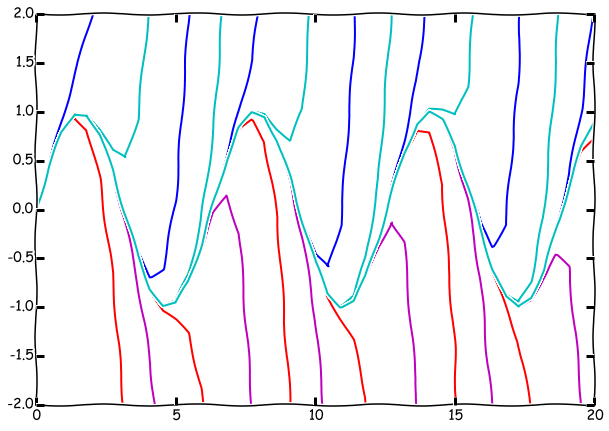

In [3]:
plt.xkcd() #se configura el estilo 
D=np.linspace(0.,45,100) #se define los puntos sobres los que se evaluara numsin y el sin(x)
senMC, s=subplots(1, 1, figsize=(10, 7))
s.set_xlim(0, 20)
s.set_ylim(-2, 2)
numsin=vectorize(numsin)
#se hacen iteracion pintando cambiando el orden segun varia i
for i in range(2, 100):
    s.plot(D, numsin(D, i))
s.plot(D, sin(D)) #graficamos el sin "real" para ver como los terminos van convergiendo a el 

encontraremos para cual termino el promedio de la diferencia del sin numerico y el sin "real" es menor a 0.01, y veremos que problemas encontraremos.

In [4]:
#definicion de variables necesarias para las iteraciones
parar=False
n=1
terminos=[]
promedios=[]
while(parar==False):
    #a es una lista que contiene la resta del sin real con el sin numerico evaluado en los puntos
    #definidos por el linspace
    a=abs(sin(D)-numsin(D,n))
    suma=0;
    for i in range(len(a)):
        suma+=a[i]
    
    #se encuentra el promedio
    promedio=suma/(len(a))
    #se guardan los promedios para un numero n de terminos
    promedios.append(promedio)
    terminos.append(n)
    if (promedio<0.01):
        print "#################RESPUESTA################"
        print n
        parar=True
    elif (n>500):
        print "PARO, n FUE MUY GRANDE"
        parar=True
        print promedios[490:]
    
    else:
        n+=1
    





PARO, n FUE MUY GRANDE
[3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508, 3.691651002590508]


vemos que las iteraciones pararon ya que se llego a un numero grande de termino, ademas se muestran los ultimos 10 promedio y vemos que no hay un cambio, y esto se genera al haber muy pocos puntos en los que se comparan las funciones, ademas de que el computador aproxima a 0 muchos numeros cuando su orden de magnitud es muy pequeño, para ver esto mejor grafiquemos el promedio de las funciones en funcion a el numero de terminos

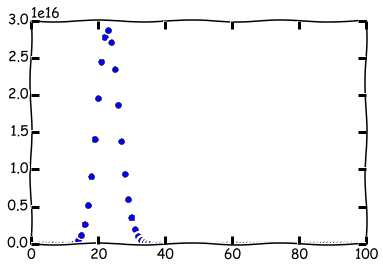

In [5]:
plt.plot(terminos[:100],promedios[:100],'o')
plt.show()

como vemos la funcion nos muestra que la diferencia entre las funciones empezo a crecer cuando los terminos aumentan, pero despues, como era de esperarse, la diferencia va disminuyendo, tanot hasta aparentemente llegar a cero, pero vimos que se estabilizan en un numero constante que es 3.691651002590508, para solucionar esto, cojamos mas puntos en un intervalo menor, al haber mas numeros, el calculo sera mas pesado, pero sera mucho mas exacto.


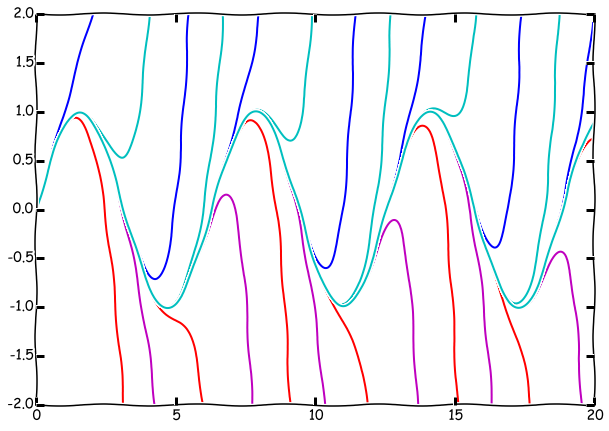

In [6]:
D=np.linspace(0.,25,1000)#se define el nuevo intervalo de puntos que se usaran para evaluar todo
senMC, s=subplots(1, 1, figsize=(10, 7))
s.set_xlim(0, 20)
s.set_ylim(-2, 2)
numsin=vectorize(numsin)
#se hacen iteracion pintando cambiando el orden segun varia i
for i in range(2, 100):
    s.plot(D, numsin(D, i))
s.plot(D, sin(D))

vemos que la grafica generada es mas suave, y esto es gracias a el mayor numero de puntos usados en un intervalo mas pequeño, y esto es mas exactitud en el calculo 

In [7]:
#definicion de variables necesarias para las iteraciones
parar=False
n=1
terminos=[]
promedios=[]
while(parar==False):
    #a es una lista que contiene la resta del sin real con el sin numerico evaluado en los puntos
    #definidos por el linspace
    a=abs(sin(D)-numsin(D,n))
    suma=0;
    for i in range(len(a)):
        suma+=a[i]
    
    #se encuentra el promedio
    promedio=suma/(len(a))
    #se guardan los promedios para un numero n de terminos
    promedios.append(promedio)
    terminos.append(n)
    if (promedio<0.01):
        print "#################RESPUESTA################"
        print n
        parar=True
    elif (n>500):
        print "PARO, n FUE MUY GRANDE"
        parar=True
        print promedios[490:]
    
    else:
        n+=1
    

#################RESPUESTA################
34


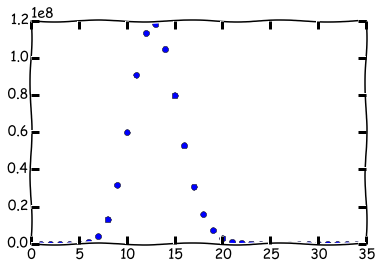

[12.499714658583132, 12.499714658583132, 639.19364536811042, 12951.335088654261, 138880.37829044342, 916560.72993516258, 4085787.8472454636, 13109771.025654312, 31715057.914371755, 59930339.047477178, 90952677.260178849, 113367630.65037802, 118204058.88181071, 104683059.92892663, 79765764.883036017, 52872616.293473303, 30778158.635907285, 15865154.85794517, 7294441.5953278877, 3010787.7196353879, 1122017.2423169881, 379476.29262835858, 117017.5799273712, 33038.97145948351, 8573.8472749599205, 2052.2105310164211, 454.53144451950317, 93.4310549749069, 17.872954906814034, 3.1899615759551461, 0.53246073962216856, 0.083303371467395804, 0.012240747337066862, 0.0016926375214074173]


In [8]:
plt.plot(terminos,promedios,'o')
plt.show()
print promedios

#Conclusión
al cambiar el intervalo y el numero de puntos a comparar, el calculo es mucho mas pesado para el computador, pero del mismo modo es mas exacto los calculos, vemos que la serie de MacLaurin es extremadamente buena, ya que para el termino 34 la diferencia fue menor a 0.01